# Using a CNN trained for LC texture phase classification to classify LC phase transition videos

## 1. Aim

The aim of this notebook is to prove the concept of using a CNN, trained for detecting the phase of a texture between Isotropic, Nematic, SmA, SmF, and Cholesteric, for detecting what phase is present in a video of a LC undergoing a phase transition. The approach will be to train a CNN on LC texture images "good" LC texture classifier. Then, this trained CNN will be applied to the frames of a test video to predict, for each frame, what phase is present in the video. It will hopefully be able to notice phase transitions.

Data leakage is important in this task, it should be made sure that images used to train the CNN are not from videos used when testing. Equally, in the training of the CNN for image classification, it should be made sure that training images and validation images do not come from the same videos (images for this task may have been obtained by using VLC for grabbing frames of LC videos).

In [1]:
file_title = "Video_phase_recognition8" 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Model
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

## 2. Retrieving data and image preprocessing

In [3]:
img_directory = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/Liquid_crystals-machine_learning/(I,N,Chol,Sm)Images"

train_dir = img_directory + "/Train"
val_dir = img_directory + "/Val"

In [4]:
train_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 128,
                                                    class_mode = "categorical",
                                                    color_mode = "grayscale",
                                                    target_size = (256, 256)
                                                   )
val_generator = val_datagen.flow_from_directory(val_dir,
                                                batch_size = 128,
                                                class_mode = "categorical",
                                                color_mode = "grayscale",
                                                target_size = (256,256)
                                               )

Found 3378 images belonging to 4 classes.
Found 1737 images belonging to 4 classes.


## 3. Building the model

In [5]:
model = tf.keras.models.Sequential([
    layers.Conv2D(16, kernel_size=(5,5), activation = "relu", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001), input_shape=(256,256,1)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(32, kernel_size=(3,3), activation = "relu", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(64, kernel_size=(3,3), activation = "relu", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)),
    layers.MaxPooling2D(2,2),
    
    layers.Conv2D(128, kernel_size=(3,3), activation = "relu", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)),
    layers.MaxPooling2D(2,2),
    
    layers.Flatten(),
    layers.Dense(32, activation="relu", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu", kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)),
    layers.Dropout(0.5),
    
    layers.Dense(4, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 16)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

## 4. Training the model

In [8]:
model_save_dir = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/" + str(file_title) + "_saved_model"

In [ ]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.0005)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
checkpoint = ModelCheckpoint(model_save_dir, monitor = "val_loss", save_best_only = True, mode="min")
history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=100,
                    callbacks=[checkpoint],
                    verbose=1
                   )

Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 1.3404 - accuracy: 0.4304 WARNING:tensorflow:From C:\Users\Jason\anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)\Video_phase_recognition8_saved_model\assets
27/27 [==============================] - 684s 25s/step - loss: 1.3404 - accuracy: 0.4304 - val_loss: 1.1286 - val_accuracy: 0.4324
Epoch 2/100
27/27 [==============================] - 671s 25s/step - loss: 1.0047 - accuracy: 0.5681 - val_loss: 1.3693 - val_accuracy: 0.4312
Epoch 3/100
27/2

## 5. Results

### Plotting the training and validation accuracy

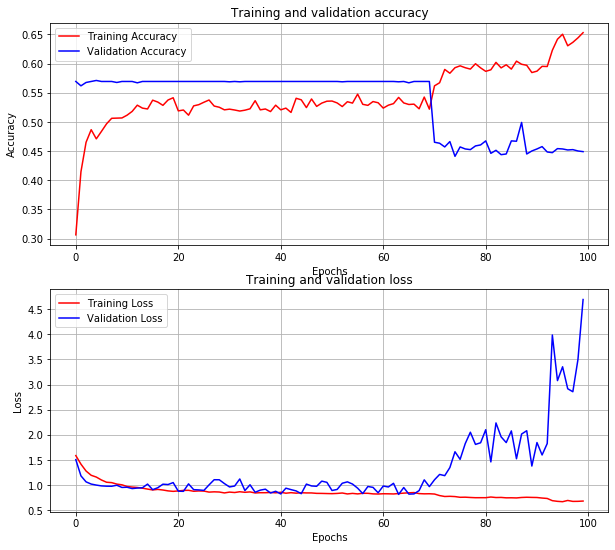

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(10,9))

plt.subplot(2,1,1)
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.subplot(2,1,2)
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.savefig(str(file_title) + "-train_val_graph")
plt.show()

Want to save the data incase I want to plot it alongside other training data graphs.

In [12]:
import pandas as pd

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

train_data_file_path = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/Liquid_crystals-machine_learning/LiquidCrystalMachineLearning/Video_classification/" + str(file_title) + "_training_data.csv"

In [14]:
acc = np.array(acc).reshape(len(acc), 1)
val_acc = np.array(val_acc).reshape(len(val_acc), 1)
loss = np.array(loss).reshape(len(loss), 1)
val_loss = np.array(val_loss).reshape(len(val_loss), 1)

training_log = np.hstack((acc, val_acc, loss, val_loss))

column_headers = ["Training accuracy", "Validation accuracy", "Training loss", "Validation loss"]

df = pd.DataFrame(data = training_log, columns = column_headers)

df.head()

,Training accuracy,Validation accuracy,Training loss,Validation loss
0,0.306394,0.569372,1.587351,1.506406
1,0.414446,0.561888,1.417100,1.184234
2,0.465068,0.567645,1.279976,1.064337
3,0.486679,0.569372,1.195163,1.020575
4,0.470989,0.571100,1.159804,1.000288


In [15]:
df.to_csv(train_data_file_path)

## 6. Testing trained model on images

In [16]:
model_load_dir = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/" + str(file_title) + "_saved_model"
trained_model = tf.keras.models.load_model(model_load_dir)

for layer in trained_model.layers:
  layer.trainable = False

trained_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 252, 252, 16)      416       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 126, 126, 16)      0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 124, 124, 32)      4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 60, 60, 64)       

### Confusion matrix and classification report

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [18]:
fixed_val_datagen = ImageDataGenerator(rescale = 1/255)
fixed_val_generator = fixed_val_datagen.flow_from_directory(val_dir,
                                                batch_size = 128,
                                                class_mode = "categorical",
                                                color_mode = "grayscale",
                                                target_size = (256,256),
                                                shuffle = False
                                               )

Found 1737 images belonging to 4 classes.


In [19]:
predictions = trained_model.predict(fixed_val_generator, batch_size=16, verbose=1)
y_pred = np.argmax(predictions, axis=1)

y_true = fixed_val_generator.classes

14/14 [==============================] - 31s 2s/step


In [20]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       458
           1       0.00      0.00      0.00       214
           2       0.42      1.00      0.59       531
           3       0.50      0.01      0.01       534

    accuracy                           0.57      1737
   macro avg       0.48      0.50      0.40      1737
weighted avg       0.54      0.57      0.45      1737



C:\Users\Jason\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True, save=True):
    """
    from: https://www.kaggle.com/grfiv4/plot-a-confusion-matrix
    """
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    
    if save:
        plt.savefig(str(file_title) + "-confusion_matrix")
    
    plt.show()

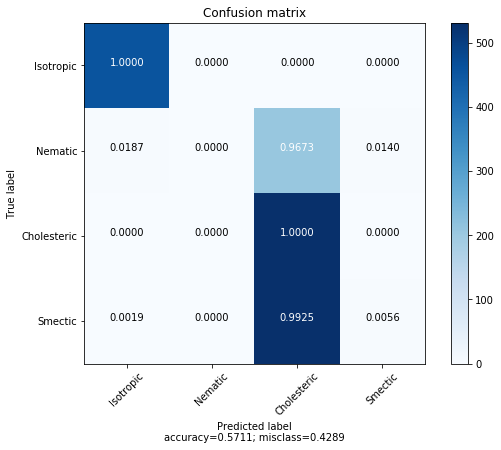

In [22]:
cm = confusion_matrix(y_true, y_pred)
target_names = ["Isotropic", "Nematic", "Cholesteric", "Smectic"]

plot_confusion_matrix(cm,
                      target_names,
                      title="Confusion matrix",
                      normalize=True,
                      save=True
                     )

## 7. Testing trained model on a video

In [20]:
import cv2
import collections

In [21]:
size = 1
queue = collections.deque(maxlen=size)

In [22]:
video_file_name = "M6-Green_heating_154-184C_20Cmin"
vid_path = "C:/Users/Jason/Documents/University/Year_4/MPhys_Project(s)/Liquid_crystals-machine_learning/(I,N,Chol,Sm)Test_videos/M6/" + video_file_name + ".avi"
vid_save_path = file_title + "_" + video_file_name + ".avi"
vid_stream = cv2.VideoCapture(vid_path)

writer = None
width = int(vid_stream.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(vid_stream.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = vid_stream.get(cv2.CAP_PROP_FPS)
fourcc = int(vid_stream.get(cv2.CAP_PROP_FOURCC))

while True:
    (grabbed, frame) = vid_stream.read()
    if not grabbed:
        break
        
    output_vid = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame = cv2.resize(frame, (254, 254)).astype("float32") / 255
    
    pred = trained_model.predict(np.expand_dims(frame, axis=(0,3)))
    y_predict = np.argmax(pred, axis=1)
    confidence = pred[0][y_predict]
    queue.append(pred)
    
    results = np.array(queue).mean(axis=0)
    i = np.argmax(results)
    label = target_names[i]
    
    phase_text = "Phase: {}".format(label)
    phase_confidence_text = "Confidence: {}".format(confidence)
    cv2.putText(output_vid, phase_text, (35,50), cv2.FONT_HERSHEY_SIMPLEX,
               1.25, (255, 255, 255), 5)
    cv2.putText(output_vid, phase_confidence_text, (35,90), cv2.FONT_HERSHEY_SIMPLEX,
               1.25, (255, 255, 255), 5)
    
    if writer is None:
        writer = cv2.VideoWriter(vid_save_path, fourcc, fps, (width, height), True)
        
    writer.write(output_vid)
    
    cv2.imshow("Output_vid", output_vid)
    key = cv2.waitKey(1) & 0xFF
    
    if key == ord("q"):
        break
        

writer.release()
vid_stream.release()
cv2.destroyAllWindows()